In [2]:
import warnings
warnings.filterwarnings('ignore')
## This will ignore and un wanted warnings by anaconda/jupyter or vscode

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

In [5]:
df.shape ##Rows and Columns

(541909, 8)

In [6]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [8]:
# Get each column one by one
for col in df.columns:
    print(col)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


Data Cleaning

In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Renaming columns names

In [10]:
d = {
        'InvoiceNo': 'invoice_num',
        'StockCode' : 'stock_code',
        'Description' : 'description',
        'Quantity' : 'quantity',
        'InvoiceDate' : 'invoice_date',
        'UnitPrice' : 'unit_price',
        'CustomerID' : 'cust_id',
        'Country' : 'country'
}

In [11]:
d

{'InvoiceNo': 'invoice_num',
 'StockCode': 'stock_code',
 'Description': 'description',
 'Quantity': 'quantity',
 'InvoiceDate': 'invoice_date',
 'UnitPrice': 'unit_price',
 'CustomerID': 'cust_id',
 'Country': 'country'}

In [12]:
df.rename(columns = d, inplace = True)

After changing column names Checking new column names

In [13]:
df.columns

Index(['invoice_num', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'cust_id', 'country'],
      dtype='object')

In [14]:
for i in df.columns:
    print(i)

invoice_num
stock_code
description
quantity
invoice_date
unit_price
cust_id
country


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Checking missing values


In [16]:
df.isnull()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [17]:
# checking number of coloumns

len(df.columns)

8

In [18]:
df.shape

(541909, 8)

In [19]:
## Checking missing values count on each column

df.isnull().sum()

invoice_num          0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
cust_id         135080
country              0
dtype: int64

In [20]:
df.isnull().sum().sort_values()

invoice_num          0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
description       1454
cust_id         135080
dtype: int64

In [21]:
df.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
invoice_num          0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

<h3>invoice_date column should be a date time data type
but in this data it is shown as Object data type

In [22]:
## Converting invoice_data data type into datetime data type

df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M', errors='coerce')


In [23]:
df.dtypes

invoice_num             object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
cust_id                float64
country                 object
dtype: object

In [24]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [25]:
## Description
df.description

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: description, Length: 541909, dtype: object

In [26]:
df["description"] = df["description"].str.lower()  ##

In [27]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dropping missing values


In [28]:
df_new = df.dropna()

In [29]:
df_new.isna().sum()

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [30]:
df_new.shape
## Large am0ount of data is removed

(406829, 8)

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [32]:
df_new.dtypes
## Cust_id should be integer not float datatype

invoice_num             object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
cust_id                float64
country                 object
dtype: object

In [33]:
df_new['cust_id'] = df_new['cust_id'].astype('int64')
df_new.info()

## Converted cust_id from float to int type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  int64         
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


### Data Frame Statistical Info

In [34]:
df_new.describe()

,quantity,unit_price,cust_id
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Remove negative values from quantity column

In [35]:
df_new.quantity > 0

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: quantity, Length: 406829, dtype: bool

In [36]:
con = df_new.quantity > 0
## Condition

In [37]:
df_new = df_new[con]

In [38]:
df_new.describe().round(2) ##Roundoff value upto 2 descimals only

,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


In [39]:
df_new.shape
## More Rows reduced
## Deleted non required data

(397924, 8)

## Adding the column - amount_spent

In [40]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

In [41]:
df_new.head()
## New column will be added at last

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount_spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [42]:
df_new.shape

(397924, 9)

In [43]:
for col in df_new.columns:
    print(col)

invoice_num
stock_code
description
quantity
invoice_date
unit_price
cust_id
country
amount_spent


## Rearranging columns for more readability

In [44]:
col_order = ['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']

In [45]:
df_new = df_new[col_order]

In [46]:
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


## Accessing invoice_date column
## Method - 1 to access column

In [47]:
df_new['invoice_date']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: invoice_date, Length: 397924, dtype: datetime64[ns]

## Method - 2 to access column

In [48]:
df_new.invoice_date

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: invoice_date, Length: 397924, dtype: datetime64[ns]

## Accessing year value from invoice_date

In [49]:
df_new['invoice_date'].dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: invoice_date, Length: 397924, dtype: int64

In [50]:
df_new['invoice_date'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: invoice_date, Length: 397924, dtype: int64

In [51]:
# df_new['year_month'] = df_new['invoice_date'].dt.year * 100 + df_new['invoice_date'].dt.month

In [52]:
df_new.head(2)

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom


In [53]:
c1 = 'year_month'

In [54]:
v1 = df_new['invoice_date'].map(lambda col: 100*(col.year) + col.month)

In [55]:
df_new.insert(loc = 2, column= c1, value = v1)

In [56]:
df_new.head(2)

,invoice_num,invoice_date,year_month,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom


## Adding a new Column 'month' from invoice_date

In [57]:
c2 = 'month'
v2 = df_new.invoice_date.dt.month

In [58]:
df_new.insert(loc= 3, column=c2 , value= v2)
df_new.head(2)

,invoice_num,invoice_date,year_month,month,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom


In [59]:
df_new.shape
## Data base is increasing as new columns are added

(397924, 11)

### In Pandas day format like
monday = 0, Tuesday = 1 ..... Sunday = 6
### Apply +1 to make Monday =1 until Sunday = 7

In [60]:
c3 = 'Day'
v3 = (df_new.invoice_date.dt.day_of_week)+1

In [61]:
df_new.insert(loc= 4, column= c3, value= v3)

In [62]:
df_new.head(2)

,invoice_num,invoice_date,year_month,month,Day,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom


In [63]:
c4 = 'Hours'
v4 = df_new.invoice_date.dt.hour

In [64]:
df_new.insert(loc=5,
              column=c4,
              value=v4)
df_new.head(2)

,invoice_num,invoice_date,year_month,month,Day,Hours,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom


# Exploratory Data Analysis (EDA)
## Group By Operations


In [65]:
df_new.groupby(by = ['cust_id']).count()

,invoice_num,invoice_date,year_month,month,Day,Hours,stock_code,description,quantity,unit_price,amount_spent,country
cust_id,,,,,,,,,,,,
12346,1,1,1,1,1,1,1,1,1,1,1,1
12347,182,182,182,182,182,182,182,182,182,182,182,182
12348,31,31,31,31,31,31,31,31,31,31,31,31
12349,73,73,73,73,73,73,73,73,73,73,73,73
12350,17,17,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...
18280,10,10,10,10,10,10,10,10,10,10,10,10
18281,7,7,7,7,7,7,7,7,7,7,7,7
18282,12,12,12,12,12,12,12,12,12,12,12,12


In [66]:
df_new.groupby(by = ['cust_id','country']).count()

,,invoice_num,invoice_date,year_month,month,Day,Hours,stock_code,description,quantity,unit_price,amount_spent
cust_id,country,,,,,,,,,,,
12346,United Kingdom,1,1,1,1,1,1,1,1,1,1,1
12347,Iceland,182,182,182,182,182,182,182,182,182,182,182
12348,Finland,31,31,31,31,31,31,31,31,31,31,31
12349,Italy,73,73,73,73,73,73,73,73,73,73,73
12350,Norway,17,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...
18280,United Kingdom,10,10,10,10,10,10,10,10,10,10,10
18281,United Kingdom,7,7,7,7,7,7,7,7,7,7,7
18282,United Kingdom,12,12,12,12,12,12,12,12,12,12,12


In [67]:
df_new.groupby(by = ['cust_id','country'])['invoice_num'].count()

cust_id  country       
12346    United Kingdom      1
12347    Iceland           182
12348    Finland            31
12349    Italy              73
12350    Norway             17
                          ... 
18280    United Kingdom     10
18281    United Kingdom      7
18282    United Kingdom     12
18283    United Kingdom    756
18287    United Kingdom     70
Name: invoice_num, Length: 4347, dtype: int64

In [73]:
orders = df_new.groupby(by = ['cust_id','country'], as_index= False)['invoice_num'].count()
orders

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
...,...,...,...
4342,18280,United Kingdom,10
4343,18281,United Kingdom,7
4344,18282,United Kingdom,12
4345,18283,United Kingdom,756


## Data Visualization

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
## Check Top 5 number of Orders
orders.sort_values(by='invoice_num', ascending= False).head(5)

,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


### Visualizing - Number of Orders for different Customers

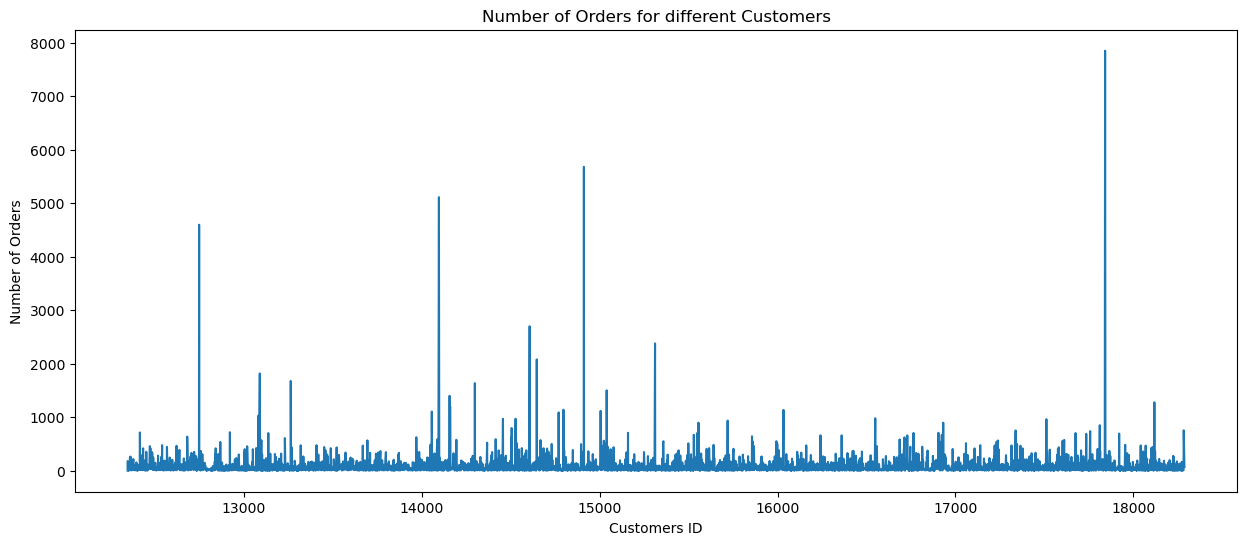

In [77]:
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))

plt.plot(orders.cust_id, orders.invoice_num)

plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')

plt.show()

In [82]:
## How much money spent by customers
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()
money_spent

,cust_id,country,amount_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
...,...,...,...
4342,18280,United Kingdom,180.60
4343,18281,United Kingdom,80.82
4344,18282,United Kingdom,178.05
4345,18283,United Kingdom,2094.88


### Number of orders per Month

In [94]:
color = sns.color_palette()

In [87]:
df_new.groupby('invoice_num')

In [88]:
df_new.groupby('invoice_num')['year_month']

In [89]:
df_new.groupby('invoice_num')['year_month'].unique()

invoice_num
536365    [201012]
536366    [201012]
536367    [201012]
536368    [201012]
536369    [201012]
            ...   
581583    [201112]
581584    [201112]
581585    [201112]
581586    [201112]
581587    [201112]
Name: year_month, Length: 18536, dtype: object

In [96]:
df_new.groupby('invoice_num')['year_month'].unique().value_counts()
## value_counts sorts and counts all the values

[201111]    2658
[201110]    1929
[201109]    1756
[201105]    1555
[201012]    1400
[201106]    1393
[201107]    1331
[201103]    1321
[201108]    1281
[201104]    1149
[201102]     998
[201101]     987
[201112]     778
Name: year_month, dtype: int64

In [97]:
df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index()
## Sorting based on index

[201012]    1400
[201101]     987
[201102]     998
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1281
[201109]    1756
[201110]    1929
[201111]    2658
[201112]     778
Name: year_month, dtype: int64

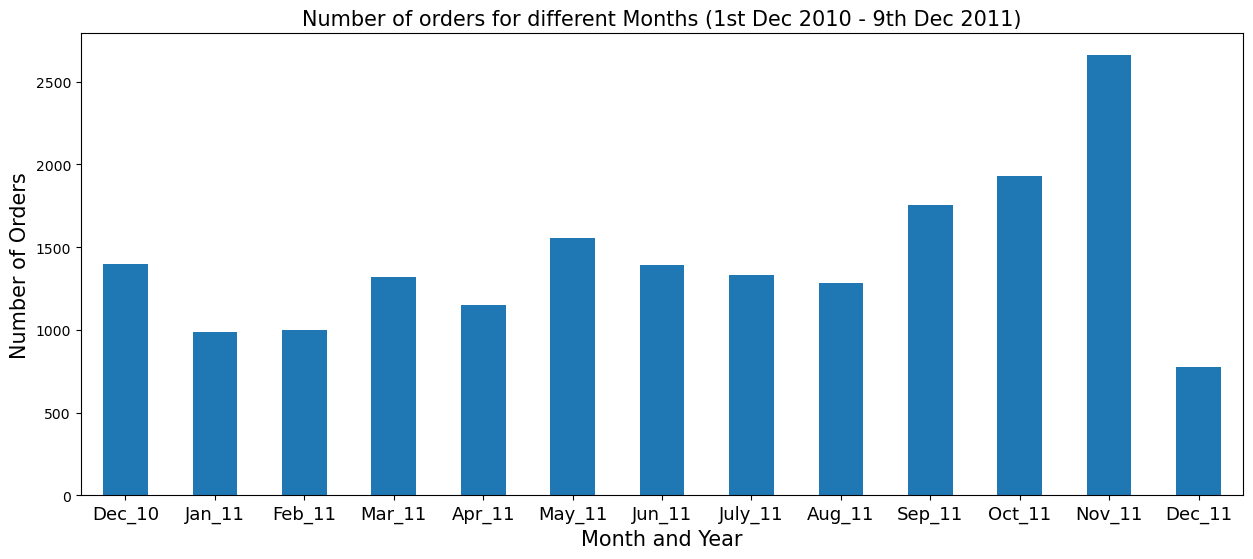

In [95]:
ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind = 'bar',color = color[0],figsize = (15,6))

ax.set_xlabel('Month and Year',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)', fontsize = 15)

t = ('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11')

ax.set_xticklabels(t, rotation='horizontal', fontsize=13)

plt.show()

In [100]:
df_new.groupby('invoice_num')['Day'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: Day, dtype: int64

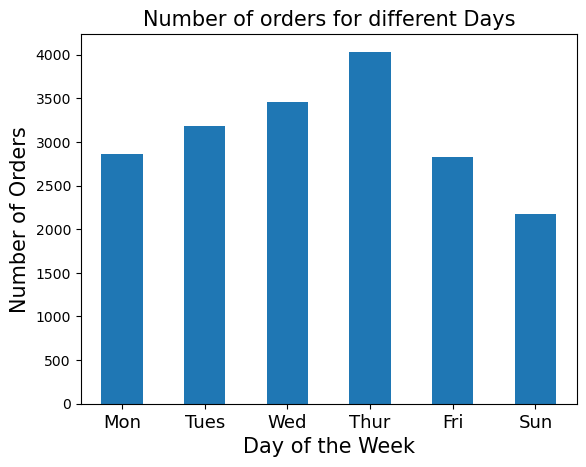

In [105]:
ax = df_new.groupby('invoice_num')['Day'].unique().value_counts().sort_index().plot(kind = 'bar',color = color[0])

ax.set_xlabel('Day of the Week',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days', fontsize = 15)

d = ('Mon','Tues','Wed','Thur','Fri','Sun')

ax.set_xticklabels(d, rotation='horizontal', fontsize=13)

plt.show()

## Discover patterns for unit price

In [106]:
df_new.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

### Min value for some products is Zero 0 so that menas,
### some products are free

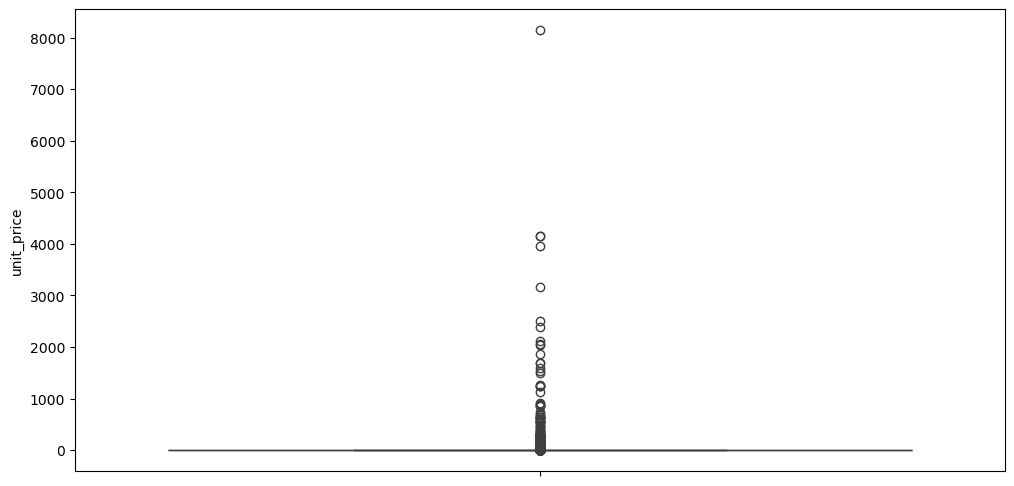

In [107]:
# check the distribution of unit price
plt.subplots(figsize = (12,6))

sns.boxplot(df_new.unit_price)
plt.show()

In [108]:
df_free = df_new[df_new.unit_price == 0]

In [110]:
len(df_free)

40

In [113]:
df_free.year_month.sort_index(ascending= False)

502122    201111
485985    201111
480649    201111
479546    201111
479079    201111
454464    201111
454463    201111
446794    201111
446793    201111
446125    201111
439361    201111
436961    201111
436597    201111
436428    201111
420404    201110
395529    201110
379913    201110
361825    201109
358655    201109
314748    201108
314747    201108
314746    201108
314745    201108
298054    201108
285657    201108
282912    201107
279324    201107
198383    201105
187613    201105
157042    201104
145208    201104
139453    201103
130188    201103
86789     201102
56674     201101
47070     201101
47068     201101
40089     201012
33576     201012
9302      201012
Name: year_month, dtype: int64

Text(0.5, 1.0, 'Frequency for different Months (Dec 2010 - Dec 2011)')

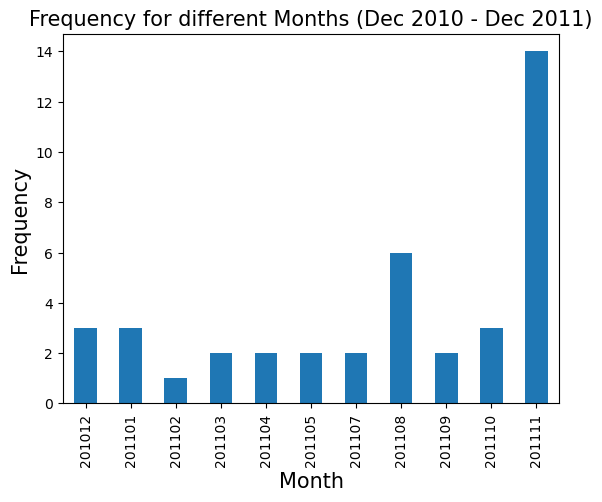

In [118]:
ax = df_free.year_month.value_counts().sort_index().plot(kind = 'bar')
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)

In [122]:
df_free.year_month.value_counts()
### It will count all values except missing values
### It wil perform sort over values not on indexes

201111    14
201108     6
201012     3
201101     3
201110     3
201103     2
201104     2
201105     2
201107     2
201109     2
201102     1
Name: year_month, dtype: int64

In [123]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

therefore in 201111 most of the free products were shipped

In [127]:
df_new.groupby('country')['invoice_num'].count()

country
Australia                 1185
Austria                    398
Bahrain                     17
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            748
Cyprus                     614
Czech Republic              25
Denmark                    380
EIRE                      7238
European Community          60
Finland                    685
France                    8342
Germany                   9042
Greece                     145
Iceland                    182
Israel                     248
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2363
Norway                    1072
Poland                     330
Portugal                  1462
RSA                         58
Saudi Arabia                 9
Singapore                  222
Spain                     2485
Sweden                     451


In [128]:
df_new.groupby('country')['invoice_num'].count().sort_values()

country
Saudi Arabia                 9
Bahrain                     17
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Unspecified                244
Israel                     248
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Sweden                     451
Cyprus                     614
Finland                    685
Channel Islands            748
Italy                      758
Norway                    1072
Australia                 1185
Portugal                  1462
Switzerland               1842
Belgium                   2031
Netherlands               2363


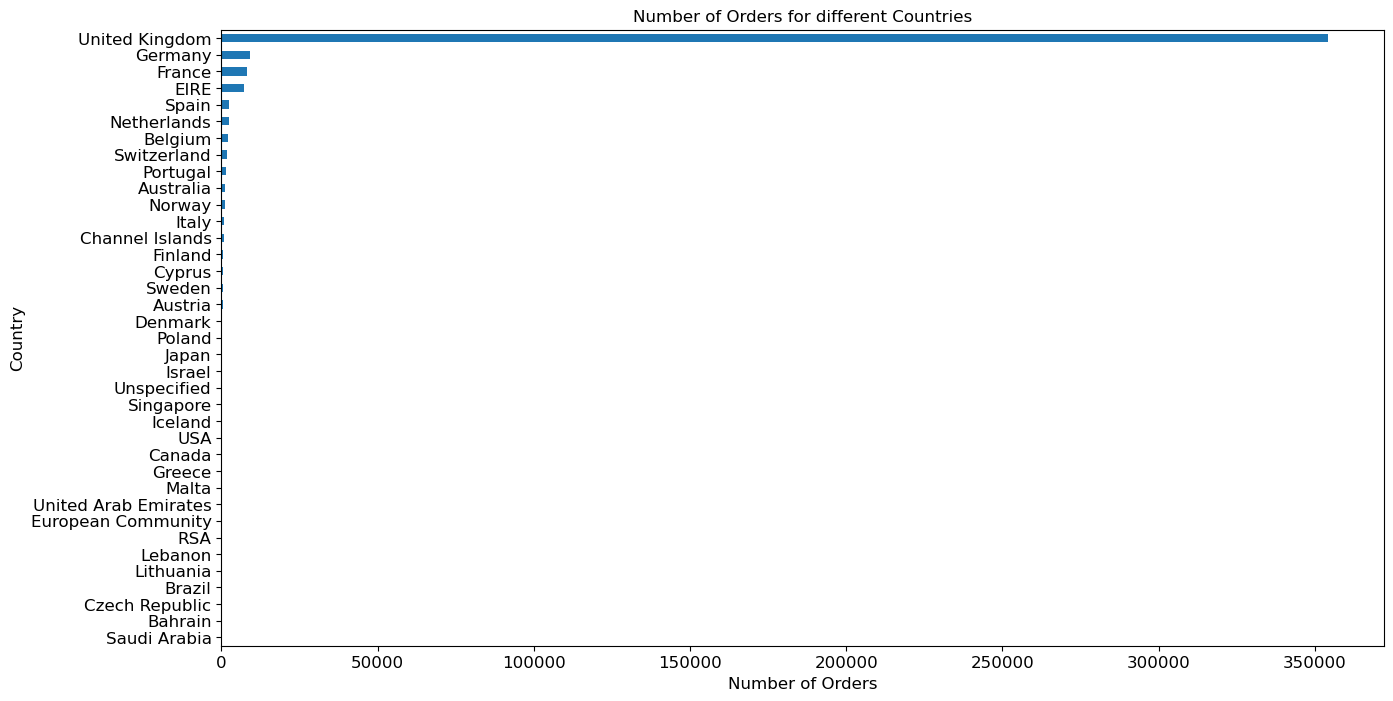

In [129]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

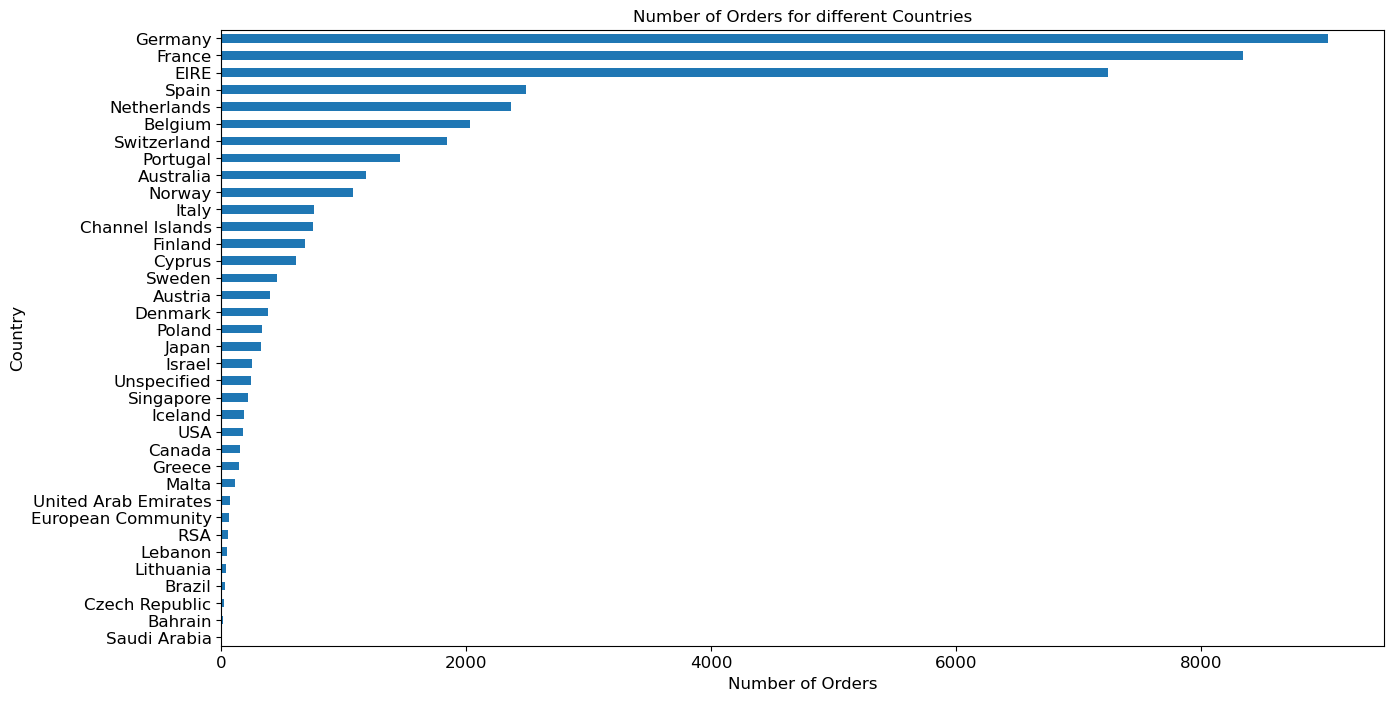

In [131]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()

## Deleting UK as it is most dominating country
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()


## How much money spent by each country?

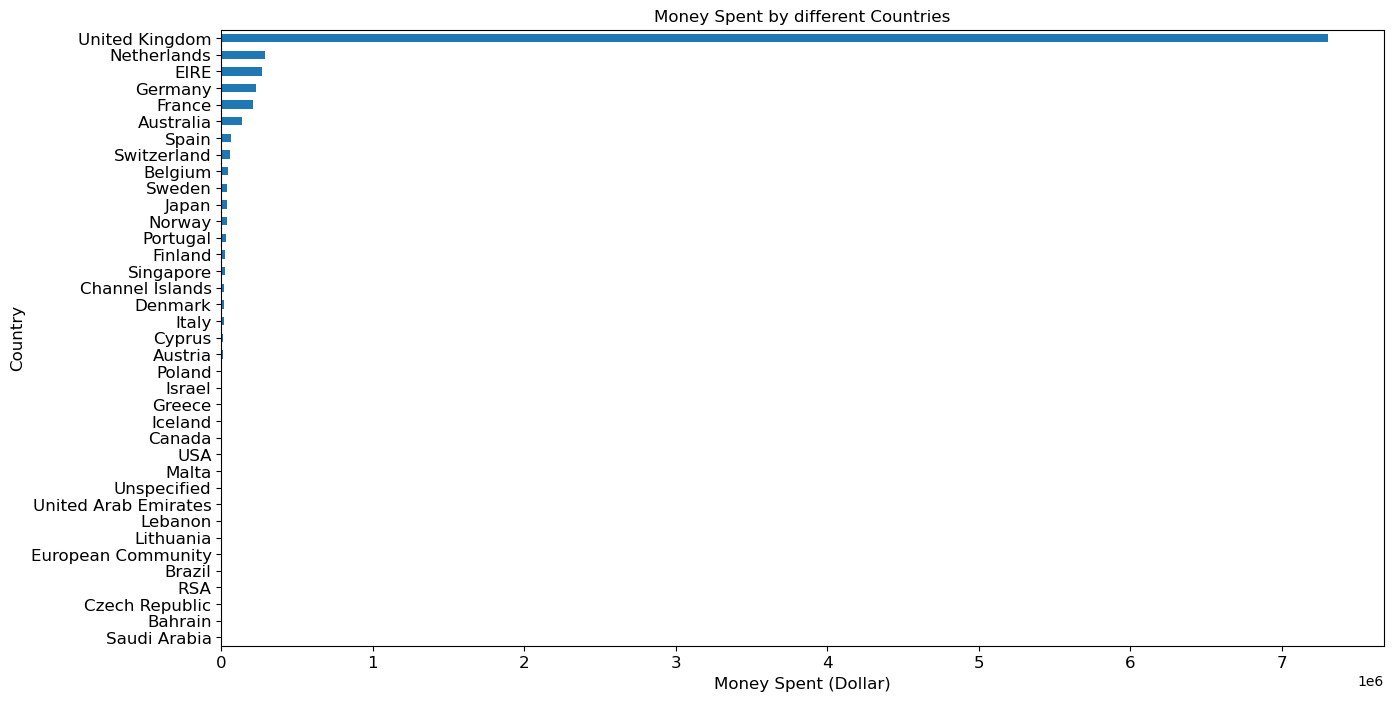

In [132]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

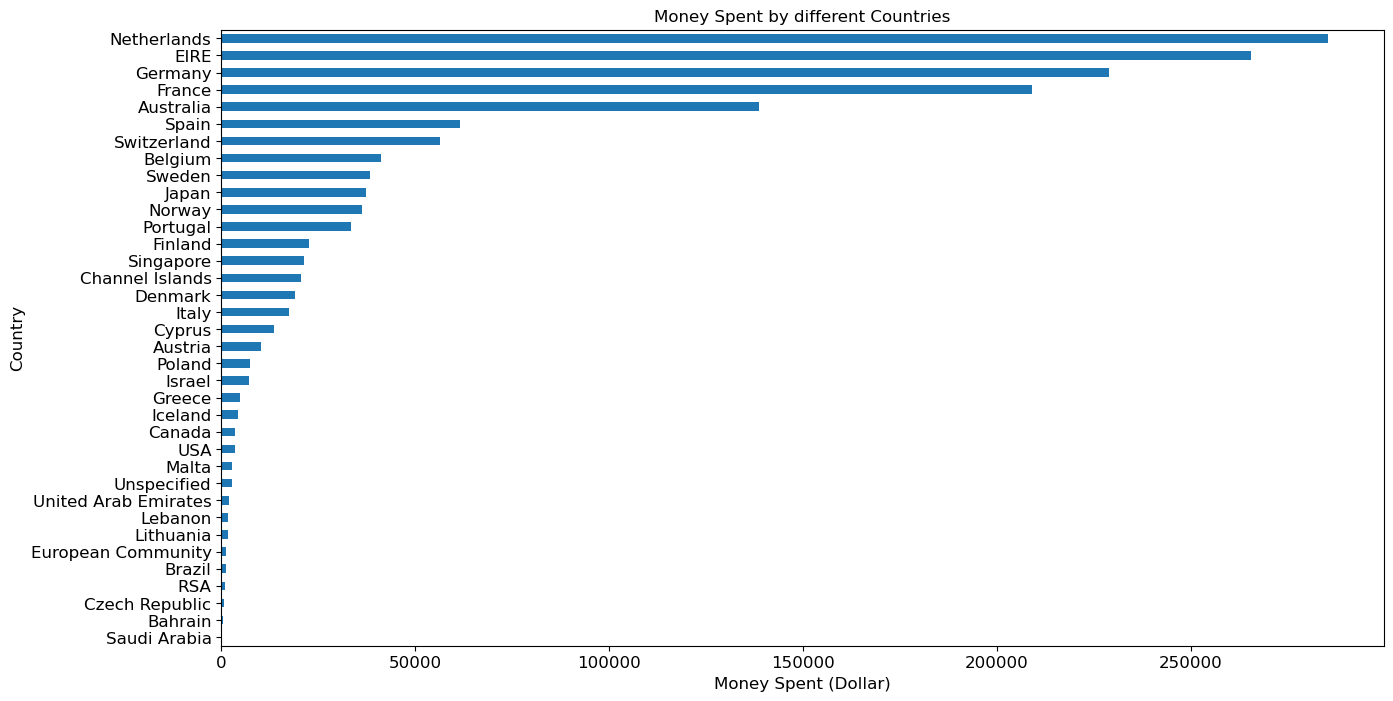

In [133]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()